# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results. 

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Project Name
Project mentor: Xuan Zhang

Nick Lu <tlu32@jh.edu>, Keyi Ding <kding5@jh.edu>, Ting Li <tli79@jh.edu>

[Link_to_git_repo](https://github.com/KeyiDing/ML_final_project.git)

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. "Expect to complete #1": Measure hate level of an article. (Lack of proper training data)
2. "Expect to complete #2": Categorize different types of hateful language (racial, sexual, ...). (Lack of proper training data)
3. "Expect to complete #3": Formalize hateful conduct policy. (Lack of sufficient research on the topipc)
4. "Wourld like to complete #1": Apply to other languages. (Generally our method works, but still lack of testing on a large scale)
5. "Wourld like to complete #2": Generate non-offensive sentences.(Lack of proper training data)


### Completed Deliverables
1. "Must complete #1": Preprocess input sentences to extract text [information](#info).
2. "Must complete #2": Train neural network to predict whether a given sentence contains hateful or offensive [speeches](#speech).
3. "Must complete #3": Generate a list of improper [words](#words).
4. "Would like to complete #3": Take non-text information (such as emojis) into [account](#words).


### Additional Deliverables
1. We implemented 2 models to do binary-classification and multi-class classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Preliminaries

## What problem were you trying to solve or understand?

What are the real-world implications of this data and task?

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

What makes this problem unique?

What ethical implications does this problem have?

We are trying to solve the problem of automating hate speech and offensive language detection. 

Hate speeches are common on social media, and it would be easier for such speeches to be regulated if some program can automatically detect them. The problem is similar to the language recognition in $\text{hw3}$ lab in that we take a natural language input as a sequence, and train a model to predict some labels associated with such input sequence. The unique part of this task is that hate speech/offensive language is sometimes hard to detect because it really depends on the context the language is used. By automating hate speech and offensive language detection, we could contribute to making a more healthy internet environment. 

## Dataset(s)

##Describe the dataset(s) you used.

The dataset that we are working with is a corpus consists of sentences from Twitter with labels on whether people think the sentences are hateful or offensive. 

##How were they collected?
The data were collected using a crowd-sourced hate speech lexicon to find hate speech containing tweets. 

##Why did you choose them?

We chose this dataset because the baseline paper that we are referencing to collected the data.
##How many examples in each?
The dataset that we chose contains $24773$ examples. The $3$ labels are ``hate_speech``, ``offensive_language``, and ``neither``. ``class``, essentially a vote, represents the majority crowdsourced opinion of whether a particular tweet belongs to ``hate_speech``, ``offensive_language``, or ``neither``.

In [ ]:
# Load your data and print 2-3 examples
data = pd.read_csv("/content/labeled_data.csv")
data['class'] = data['class'].replace(0, 1)
data['class'] = data['class']-1
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,0,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,1,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,0,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,0,youu got wild bitches tellin you lies


<a id='info'></a>
# Pre-processing

###What features did you use or choose not to use? Why?
We take a sequence as an input and take all the features in the sequence. This is because we use natural language as input, we use  the entire sequence.
###If you have categorical labels, were your datasets class-balanced?
We have categorical labels, and our dataset is not class-balanced. The majority of the tweets are labeled as offensive language.
###How did you deal with missing data? What about outliers?
The dataset we chose is free of missing data. Outliers in our case mainly consist of non-textual tweets. We removed the outliers. 
###What approach(es) did you use to pre-process your data? Why?

We leveraged regular expressions to pre-process the tweets. This is because we want to remove the irrelevant, distracting information in the raw tweet data. Items including usernames, retweet symbols and hashtags are removed. Following is a complete list of the things that are removed and the corresponding regex. 

|Target |Regex
---------|----------------------
|Username|```@.*:" and "@.* "```|
|Retweet|``` !*\sRT```|
|https|```r'https?://[^ ]+'```|
|html bad encoding|```"&.*;"```|
|Recurring letter|```'([A-Za-z])\1{2,}' to '\1'```|
|Recurring punctuation|```'(\W)\1{1,}' to '\1'```|
|Hashtag|```'#.* '```|
|Non-alphanumeric|```[^A-Za-z0-9]+```|

###Are your features continuous or categorical? How do you treat these features differently?
Our features are categorical and we created a balanced input dataset. 

In [ ]:
# For those same examples above, what do they look like after being pre-processed?
data = pd.read_csv("/content/data_processed.csv")
data['class'] = data['class'].replace(0, 1)
data['class'] = data['class']-1
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,1,as a woman you shouldnt complain about cleani...
1,1,3,0,3,0,0,boy dats coldtyga dwn bad for cuffin dat hoe ...
2,2,3,0,3,0,0,dawg you ever fuck a bitch and she start to c...
3,3,3,0,2,1,0,she look like a tranny
4,4,6,0,6,0,0,the shit you hear about me might be true or i...
...,...,...,...,...,...,...,...
24768,25291,3,0,2,1,0,yous a muthafin lie right his tl is trash now ...
24769,25292,3,0,1,2,1,youve gone and broke the wrong heart baby and ...
24770,25294,3,0,3,0,0,young buck wanna eat dat nigguh like i aint fu...
24771,25295,6,0,6,0,0,youu got wild bitches tellin you lies


([<matplotlib.axis.XTick at 0x7f516373dd00>,
 [Text(0, 0, 'hate'), Text(0, 0, 'offensive'), Text(0, 0, 'neither')])

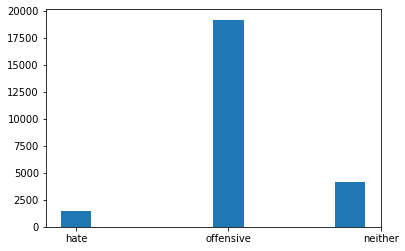

In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.
data = pd.read_csv("labeled_data.csv")
#data['class'].value_counts()
label = [np.array([data["hate_speech"][i]/data["count"][i],data["offensive_language"][i]/data["count"][i],data["neither"][i]/data["count"][i]]) for i in range(len(data))]
cla = [np.argmax(r) for r in label]
plt.hist(cla,align="left")
plt.xticks(np.arange(3),["hate","offensive","neither"])

([<matplotlib.axis.XTick at 0x7f5165654c10>,
 [Text(0, 0, 'hate'), Text(0, 0, 'offensive'), Text(0, 0, 'neither')])

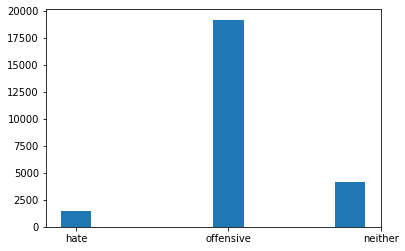

In [ ]:
data_p = pd.read_csv("data_processed.csv")
#data_p['class'].value_counts()
label_p = [np.array([data_p["hate_speech"][i]/data_p["count"][i],data_p["offensive_language"][i]/data_p["count"][i],data_p["neither"][i]/data_p["count"][i]]) for i in range(len(data_p))]
cla_p = [np.argmax(r) for r in label_p]
plt.hist(cla,align="left")
plt.xticks(np.arange(3),["hate","offensive","neither"])

|Class|Count_Before|Count_After|
|-----|-----|------|
|Offensive Language|19190|19187|
|Hate Speech|4163|4158|
|Neither|1430|1428|

<a id='speech'></a>
# Models and Evaluation

## Experimental Setup

### How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?
Since we used deep learning model to do multi-class classification, we chose **accuracy** as our major evaluation metric while we also calculate other metrics including **precision**, **recall**, and **F1 score**.
### What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?
For both binary classifier and 3-class classifier, we used cross-entropy loss to train our model.

For the binary classifier, we used cross-entropy in order to minimize the difference in distribution between our input labels and the predicted distribution.

For the 3-class classifier, we used a soft-label (a 3*1 vector) as the y label. The soft-label can be seen as probability distribution over the three possible outcomes (hate, offensive, neither) based on labelers’ votes, and our goal of training the model is to get a probability distribution that is close to the y-label distribution. We experimented with KL-loss and cross-entropy to capture the difference between the input and predicted distributions, and we decided to use cross-entropy because it gives better results.
### Train-validation-test split
We did a 80:16:4 train-validation-test split on the dataset.Because our training dataset is not balanced, there are more "offensive language" than "hate speech" and "neither", we implemented a balanced train-validation-test split by normalizing the dataset and adding more weight to "hate speech" and "neither".

## Baselines 

###What baselines did you compare against? Why are these reasonable?
We compared against the results in the paper *Automated Hate Speech Detection and the Problem of Offensive Language* by Davidson et al. We are performing the same task on the same dataset, but with different machine learning methods, and we expect the results to be comparable.
###Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?
The baseline paper that we are referencing to evaluated their models based on three metrics: **precision**, **recall**, and **F1 score**. Their best performing model has a precision of $0.91$, recall of $0.90$, and F1 score of $0.90$. According to their confusion matrix, nearly 40% of the hate speech are misclassfied.

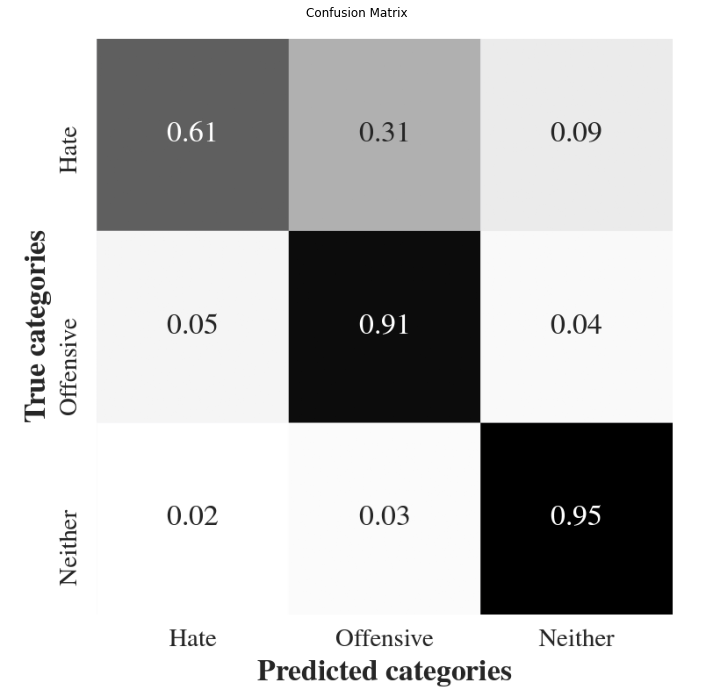

In [ ]:
img1 = mpimg.imread('/content/davidsonetal.png')
plt.figure(figsize=[10,10])
imgplot = plt.imshow(img1)
plt.axis("off")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo

[Link to Git repo](https://github.com/KeyiDing/ML_final_project/blob/main/ML_project_3labels.ipynb)

# Methods
##What methods did you choose? Why did you choose them?

We implemented two separate LSTM models to perform both a binary classification (offensive + hate vs. neither) and 3-class classification (offensive vs. hate vs. neither). We first trained our own Word2Vec model that converts the words into vectors based on our dataset, so that each sentences become sequences of fixed-length vectors. We used the LSTM model to train the classifier because our input data is natural language, and the LSTM model can learn the dependencies in the sequence. We added additional layers with fewer dimensions before the final to-label layer to force the model to learn more representative features in the input data. We also used dropout to avoid overfitting.

##How did you train these methods, and how did you evaluate them? Why?
We evaluated the models by first constructing a confusion matrix. We then calculated the following four metrics:


1.   Accuracy
2.   Precision
3.   Recall
4.   F1 score

##Which methods were easy/difficult to implement and train? Why?
The 3-class classifier is more difficult to implement, and the main difference comes from the quality of the data. Because there isn’t a clear boundary between hate vs. offensive language even for human evaluators, the 3-class classifier did not reach the precision we expected, and therefore we implemented the binary classifier to take better advantage of the available data.

##For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?
For both models, we experimented with learning rates and epochs. Our result showed that learning rate has a large influence on the optimizers’ ability to learn the data, and we eventually decided to use an adaptive learning rate which decreases the learning rate when the change in loss is too small. Regarding the epochs, our 3-class classifier is overfitted based our validation loss when the epochs is 100, and thus we decided to use early-stopping and reduce the epochs to 75 to avoid overfitting.

In [ ]:
# Code for training models, or link to your Git repository

[Git repository](https://github.com/KeyiDing/ML_final_project/blob/main/ML_project_3labels.ipynb)

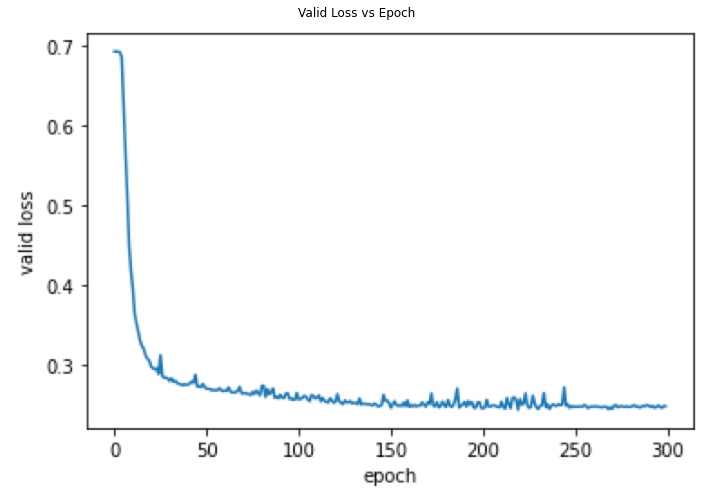

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.
img1 = mpimg.imread('/content/loss.png')
plt.figure(figsize=[10,10])
imgplot = plt.imshow(img1)
plt.axis("off")
plt.title("Valid Loss vs Epoch")
plt.tight_layout()
plt.show()

## Results

##Show tables comparing your methods to the baselines.



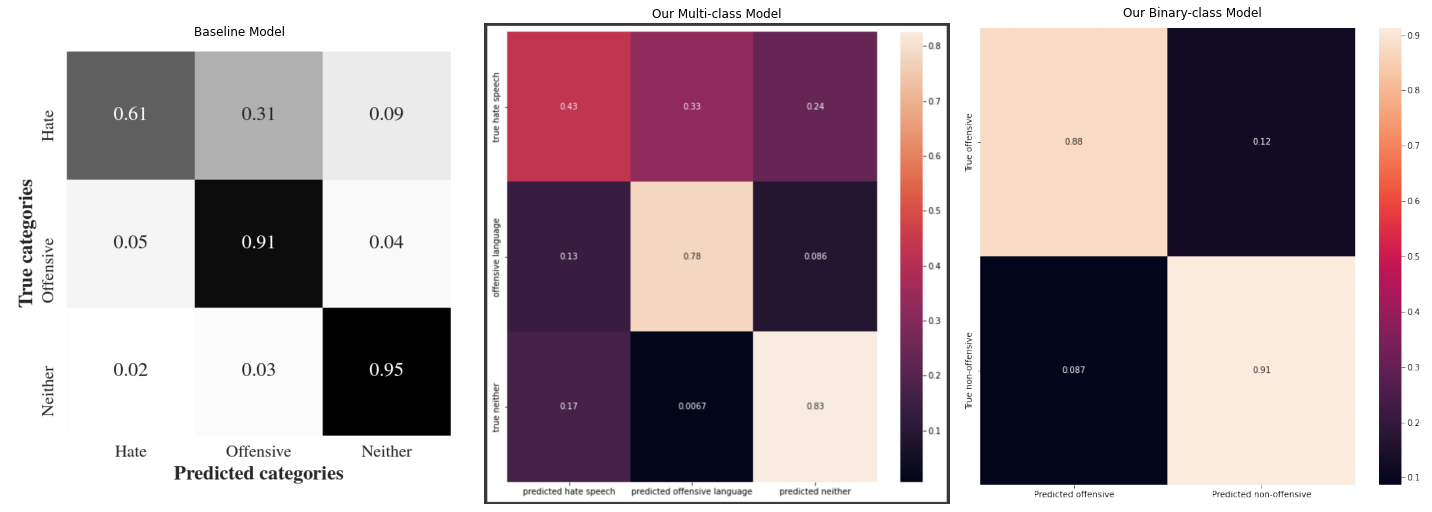

In [ ]:
img1 = mpimg.imread('/content/davidsonetal.png')
img2 = mpimg.imread('/content/confusion.png')
img3 = mpimg.imread('/content/binary.png')
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
imgplot = plt.imshow(img1)
plt.axis("off")
plt.title("Baseline Model")
plt.subplot(1,3,2)
imgplot = plt.imshow(img2)
plt.axis("off")
plt.title("Our Multi-class Model")
plt.subplot(1,3,3)
imgplot = plt.imshow(img3)
plt.axis("off")
plt.title("Our Binary-class Model")
plt.tight_layout()
plt.show()

###What about these results surprised you? Why?
Generally, our model can give more accurate predicitions of longer sequences than shorter ones.
Given that this is a multi-class classification problem, Softmax function actually yields worse performance than  ReLU does, though theoretically it should give better results.
###Did your models over- or under-fit? How can you tell? What did you do to address these issues?
Our model overfits. As shown in the **Valid Loss vs Epoch** diagram below, valid loss increases at around the $80$-th epoch. We employed early-stopping to address overfitting. The right side of the diagram represents the valid loss after implementing over-fitting.

###What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?
Our training data is highly biased toward offensive language, and our model prediction also shows that most hate speeches are predicted as offensive. Even though we used balance split to normalize the data, we still cannot effectively learn features from the hate and neither catalog. Thus we our expectation is that we might get a better precision in hate speech and neither if we have a more balanced training set.

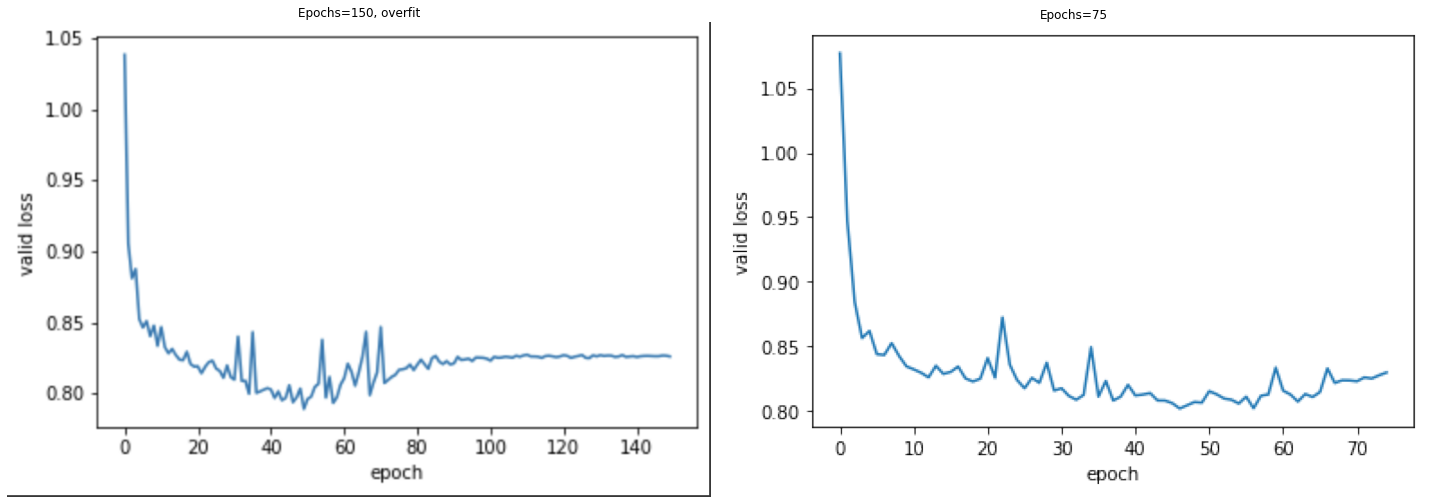

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?
img1 = mpimg.imread('/content/overfit.png')
img2 = mpimg.imread('/content/index.png')
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
imgplot = plt.imshow(img1)
plt.axis("off")
plt.title("Epochs=150, overfit")
plt.subplot(1,2,2)
imgplot = plt.imshow(img2)
plt.axis("off")
plt.title("Epochs=75")
plt.tight_layout()
plt.show()

<a id='words'></a>
# Deliverables
## Generate a list of improper words based on model prediction
We put the input tweets into the model and get a predicted label, then we do a binary classification based on the label (hate/offensive v.s. neither). Then we get two lists of the most frequent words for each class, and remove those words that appear in both lists (these words are supposed to be common words in English, such as 'I', 'you', etc.). Then we take the remaining frequent "bad words" list as the list of the improper words.

The current bad word list includes: 'h ** s','a **','sh * t','ni ** a','ni ** as','yall','yo'

### Training model with non-text information (emojis)
We also trained a model in which we didn't remove any of the emojis. Though the emojis does not have meanings in English, we can still view them as regular words, and thus does not affact the training to much. The result is similar to the model when emojis are removed.


Text(0.5, 1.0, 'Emojis not removed')

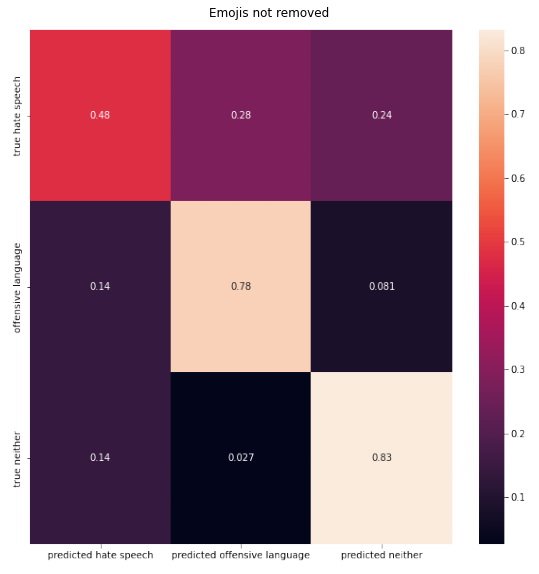

In [ ]:
plt.figure(figsize=[10,10])
emo = mpimg.imread('/content/emoji.png')
imgplot = plt.imshow(emo)
plt.axis("off")
plt.title("Emojis not removed")

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

###What concepts from lecture/breakout were most relevant to your project? How so?
Concepts including **RNN**, **LSTM**, and **word embedding** were most relevant to our project. We used **word2vec** to  learn **word embedding**. Since our model takes a sequence as input, and needs memories to work with long-term dependencies, the LSTM model is a great tool to do the task.
###What aspects of your project did you find most surprising?
We were surprised that our model performs better on longer sentences than shorter ones. 

Moreover, we are perplexed by the fact that $\text{Softmax}$ function performs worse than $\text{ReLU}$, given that we are solving a multi-class classification task.
###What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?
During the process of building this hate speech and offensive language classification model, we became conscious of the importance of spending time finding a class-balanced training dataset. If the dataset chosen was not balanced in the first place, it would take a heavy toll in the model development process to make up for the imbalanced data.

###What was the most helpful feedback you received during your presentation? Why?
The most helpful feedback we received is to change discrete integer labels to soft labels. Soft labels could capture the degree of membership of sentences to all the classes. This method avoids the hard classification of all samples to one certain class, thus makes the model more resilient.

###If you had two more weeks to work on this project, what would you do next? Why?
If we had two more weeks, we would like to 

 

1.   find a larger dataset that contains more non-hate speech and non-offensive language tweets, namely more ``neither`` entries.

2.   apply our model to other languages. This would give us a chance to examine whether our model is language specific. It would be both challenging and rewarding to attempt to design a language universal model to automate hate speech and offensive language detection in a global context. 

3. take non-textual information (such as emojis, emoticons) into account. Given that emoji-based hate is on the rise, it is crucial to develop models to detect hate speech and offensive language conveyed through non-textual contents.







# References
Davidson, T., Warmsley, D., Macy, M., Weber, I. (2017). Automated hate speech detection and the problem of offensive language. arXiv. http://arxiv.org/abs/1703.04009
Hate speech and offensive language—Dataset by thomasrdavidson. (n.d.). Data.World. Retrieved October 31, 2022, from https://data.world/thomasrdavidson/hate-speech-and-offensive-language
Mikolov, T., Chen, K., Corrado, G., Dean, J. (2013). Efficient estimation of word representations in vector space. arXiv. http://arxiv.org/abs/1301.3781